![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Data cleaning and wrangling

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

So far we have worked on `EDA`. This lab will focus on data cleaning and wrangling from everything we noticed before.

1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
2. Create a copy of the dataframe for the data wrangling.
3. Normalize the continuous variables. You can use any one method you want.
4. Encode the categorical variables
5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

**Hint for Categorical Variables**

- You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

``` python
- One hot to state
- Ordinal to coverage
- Ordinal to employmentstatus
- Ordinal to location code
- One hot to marital status
- One hot to policy type
- One hot to policy
- One hot to renew offercustomer_df
- One hot to sales channel
- One hot vehicle class
- Ordinal vehicle size

data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
- given that column "coverage" in the dataframe "data" has three categories: "basic", "extended", and "premium" and values are to be represented in the same order.

In [18]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
def columns_to_snake_case(df):
    import re
    df.columns = [re.sub(' ', '_', x).lower() for x in df.columns]
    return df

In [58]:
df=columns_to_snake_case(df)
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8681 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       8681 non-null   object        
 1   state                          8681 non-null   object        
 2   customer_lifetime_value        8681 non-null   float64       
 3   response                       8681 non-null   object        
 4   coverage                       8681 non-null   object        
 5   education                      8681 non-null   object        
 6   effective_to_date              8681 non-null   datetime64[ns]
 7   employmentstatus               8681 non-null   object        
 8   gender                         8681 non-null   object        
 9   income                         8681 non-null   int64         
 10  location_code                  8681 non-null   object        
 11  marital_status   

## Removing outliers

In [7]:
def remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

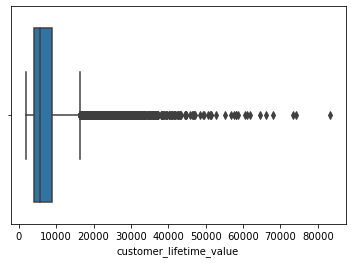

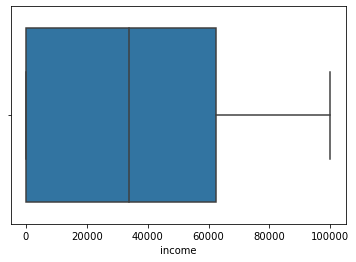

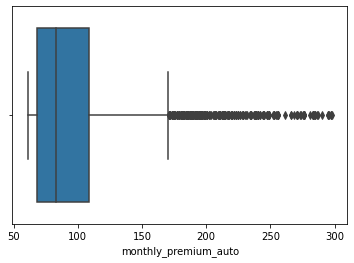

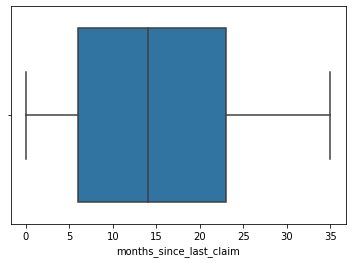

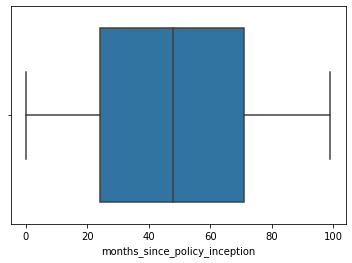

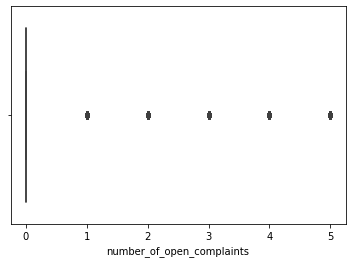

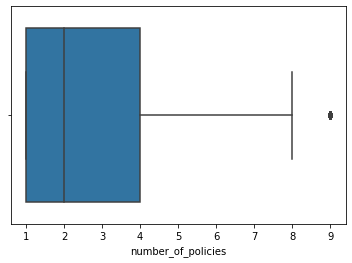

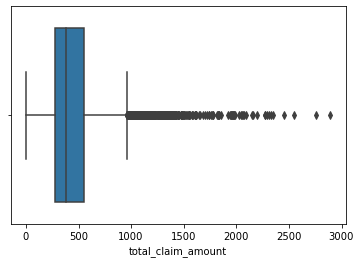

In [11]:
for feat in df.select_dtypes(include = np.number):
    sns.boxplot(x=df[feat])
    plt.show()

In [12]:
df.shape

(9134, 24)

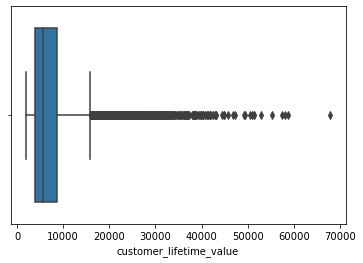

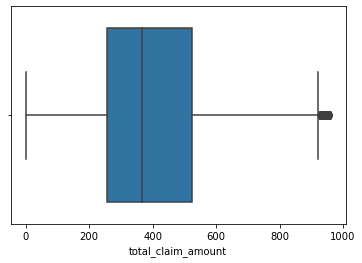

(8681, 24)

In [15]:
df_outliers = df.copy()

df_outliers = remove_outliers(df, threshold=1.5, in_columns=['total_claim_amount'])
sns.boxplot(x=df_outliers['total_claim_amount'])
plt.show()
df_outliers.shape

In [16]:
df=df_outliers

## Normalization

In [19]:
scaler = MinMaxScaler()
df_to_scale=df.select_dtypes(include = np.number)
MinMax_array=scaler.fit_transform(df_to_scale)
df_MinMax=pd.DataFrame(data=MinMax_array, index=df.index, columns=df_to_scale.columns)
df_MinMax

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.013112,0.562847,0.034043,0.914286,0.050505,0.0,0.000,0.400735
2,0.166483,0.487763,0.200000,0.514286,0.383838,0.0,0.125,0.589962
3,0.087076,0.000000,0.191489,0.514286,0.656566,0.0,0.750,0.551847
4,0.013872,0.438443,0.051064,0.342857,0.444444,0.0,0.000,0.143781
5,0.096324,0.629140,0.034043,0.400000,0.949495,0.0,0.125,0.165918
...,...,...,...,...,...,...,...,...
9129,0.325833,0.719547,0.051064,0.514286,0.898990,0.0,0.125,0.206388
9130,0.018157,0.216081,0.076596,0.400000,0.282828,0.0,0.000,0.394890
9131,0.094924,0.000000,0.102128,0.257143,0.373737,0.6,0.125,0.823617
9132,0.085237,0.219452,0.148936,0.971429,0.030303,0.0,0.250,0.719885


In [41]:
X_num_y_Mms=df_MinMax

## Encoding categorical

### Ordinal categorical features

In [53]:
ord_features=['coverage', 'employmentstatus', 'location_code', 'vehicle_size']

In [56]:
X_cat = df.select_dtypes(include = np.object).drop('customer', axis=1)
X_cat_ord=X_cat[ord_features]

for col in X_cat_ord.columns:
    print(pd.unique(X_cat_ord[col]))
    
X_cat_ord['coverage'] = X_cat_ord['coverage'].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
X_cat_ord['employmentstatus'] = X_cat_ord['employmentstatus'].map({'Employed':1, 'Unemployed':0, 'Medical Leave':2, 'Disabled':3, 'Retired':4})
X_cat_ord['location_code'] = X_cat_ord['location_code'].map({'Suburban':0, 'Rural':1, 'Urban':2})
X_cat_ord['vehicle_size'] = X_cat_ord['vehicle_size'].map({'Medsize':1, 'Small':0, 'Large':2})
X_cat_ord

for col in X_cat_ord.columns:
    print(pd.unique(X_cat_ord[col]))
    
X_cat_not_ordinal=X_cat.drop(ord_features, axis=1)

['Basic' 'Premium' 'Extended']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['Suburban' 'Rural' 'Urban']
['Medsize' 'Small' 'Large']
[0 2 1]
[1 0 2 3 4]
[0 1 2]
[1 0 2]


### One Hot Encoding categorical variables

In [57]:
encoder = OneHotEncoder(handle_unknown='error', drop='first') #drop one column for efficiency. It can be deduced
X_cat_encoded_array = encoder.fit_transform(X_cat_not_ordinal).toarray()

column_names = list(encoder.get_feature_names())

X_cat_encoded=pd.DataFrame(data=X_cat_encoded_array, index=X_cat_not_ordinal.index, columns=column_names)
X_cat_encoded

,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Yes,x2_College,x2_Doctor,x2_High School or Below,x2_Master,x3_M,x4_Married,x4_Single,x5_Personal Auto,x5_Special Auto,x6_Corporate L2,x6_Corporate L3,x6_Personal L1,x6_Personal L2,x6_Personal L3,x6_Special L1,x6_Special L2,x6_Special L3,x7_Offer2,x7_Offer3,x7_Offer4,x8_Branch,x8_Call Center,x8_Web,x9_Luxury Car,x9_Luxury SUV,x9_SUV,x9_Sports Car,x9_Two-Door Car
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9130,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9131,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9132,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### DataFrame ready

In [63]:
to_concat=[df['effective_to_date'],X_cat_encoded,X_cat_ord,X_num_y_Mms]
df_ready=pd.concat(to_concat,axis=1)
df_ready.info()
df_ready.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8681 entries, 0 to 9133
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   effective_to_date              8681 non-null   datetime64[ns]
 1   x0_California                  8681 non-null   float64       
 2   x0_Nevada                      8681 non-null   float64       
 3   x0_Oregon                      8681 non-null   float64       
 4   x0_Washington                  8681 non-null   float64       
 5   x1_Yes                         8681 non-null   float64       
 6   x2_College                     8681 non-null   float64       
 7   x2_Doctor                      8681 non-null   float64       
 8   x2_High School or Below        8681 non-null   float64       
 9   x2_Master                      8681 non-null   float64       
 10  x3_M                           8681 non-null   float64       
 11  x4_Married       

,effective_to_date,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Yes,x2_College,x2_Doctor,x2_High School or Below,x2_Master,x3_M,x4_Married,x4_Single,x5_Personal Auto,x5_Special Auto,x6_Corporate L2,x6_Corporate L3,x6_Personal L1,x6_Personal L2,x6_Personal L3,x6_Special L1,x6_Special L2,x6_Special L3,x7_Offer2,x7_Offer3,x7_Offer4,x8_Branch,x8_Call Center,x8_Web,x9_Luxury Car,x9_Luxury SUV,x9_SUV,x9_Sports Car,x9_Two-Door Car,coverage,employmentstatus,location_code,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2011-02-24,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1,0.013112,0.562847,0.034043,0.914286,0.050505,0.0,0.000,0.400735
2,2011-02-19,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,1,0,1,0.166483,0.487763,0.200000,0.514286,0.383838,0.0,0.125,0.589962
3,2011-01-20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1,0.087076,0.000000,0.191489,0.514286,0.656566,0.0,0.750,0.551847
4,2011-02-03,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,0.013872,0.438443,0.051064,0.342857,0.444444,0.0,0.000,0.143781
5,2011-01-25,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,1,1,0.096324,0.629140,0.034043,0.400000,0.949495,0.0,0.125,0.165918


In [65]:
df_ready.to_csv(r'lab-data-cleaning-and-wrangling\data_ready.csv')